# 第一大題

## Please follow the algorithm shown below and use ϵ-greedy policy to implement the DQN.

In [ ]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install -U colabgymrender==1.0.8 
!pip install box2d-py
!pip install box2d

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
class DRL(nn.Module):
    def __init__(self):
        super(DRL, self).__init__()
        self.Layer1 = nn.Linear(8, 150) # State參數有8個
        self.Layer2 = nn.Linear(150, 120)
        self.Layer3 = nn.Linear(120, 4) # Action參數有4個
    def forward(self, x):
        X = nn.ReLU()(self.Layer1(x))
        X = nn.ReLU()(self.Layer2(X))
        X = self.Layer3(X) # 最後一層不做softmax轉換機率，直接做output
        return X

In [ ]:
import numpy as np
from torch.distributions import Categorical
def agent_move(mod, enviroment, state, epsilon):
    if np.random.rand() <= epsilon:
        return int(np.random.choice([0, 1, 2, 3], 1))
    else:
        #act_prob = Categorical(action_prob)
        #act = act_prob.sample()
        act_val = mod(state)
        act = torch.argmax(act_val)
        return int(act)

In [ ]:
import gym
env = gym.make("LunarLander-v2")
# 超參數
epsilon = 1.0
epsilon_decay = .996
epsilon_min = 0.01
# 模型設定
model = DRL()
criterion = nn.MSELoss()
OPT = torch.optim.Adam(model.parameters(), lr = 0.001)
# 訓練方式
Memory = list()
LOSS = list()

In [ ]:
for epoch in range(500):
    ## 初始化
    state = env.reset()
    state = torch.from_numpy(state.reshape(1, 8)).to(torch.float32)
    REWARDS = 0
    step = 0
    while step < 3000:
        step += 1
        act = agent_move(model, env, state, epsilon)
        temp, reward, finish, _ = env.step(act)
        REWARDS += reward
        temp = torch.from_numpy(temp.reshape(1, 8)).to(torch.float32).detach()
        Memory.append([state, act, reward, temp, finish])
        state = temp
        if len(Memory) > 1000000:
            Memory.pop(0)
        
        # 模型訓練
        if len(Memory) < 64:
            continue
        else:
            batchidx = np.random.choice([i for i in range(len(Memory))], 64, replace = False)
            minibatch = list()
            for i in batchidx:
                minibatch.append(Memory[i])
            status = torch.stack([obj[0] for obj in minibatch]).reshape(64, 8).to(torch.float32)
            moves = torch.tensor([obj[1] for obj in minibatch]).to(torch.float32)
            gain = torch.tensor([obj[2] for obj in minibatch]).to(torch.float32)
            new_status = torch.stack([obj[3] for obj in minibatch]).reshape(64, 8).to(torch.float32)
            done = torch.tensor([obj[4] for obj in minibatch]).to(torch.float32)
            
            target = gain + 0.99*torch.max(model(new_status), axis = 1)[0]*(1 - done)
            Target = model(status)
            I = [i for i in range(64)]
            Target[I, moves.to(torch.long)] = target.requires_grad_(True)
            
            OPT.zero_grad()
            loss = criterion(model(status), Target)
            loss.backward()
            OPT.step()
            if epsilon > epsilon_min:
                epsilon *= epsilon_decay
        # 模型訓練
        
        if finish:
            print('Epoch {0}, Rewards {1}'.format(len(LOSS), REWARDS), end='')
            break
    LOSS.append(REWARDS)
    print(', Avg {0}'.format(np.mean(LOSS)))

Epoch 0, Rewards 42.04532202743502, Avg 42.04532202743502
Epoch 1, Rewards -187.25510591971033, Avg -72.60489194613766
Epoch 2, Rewards -73.58010051140107, Avg -72.92996146789213
Epoch 3, Rewards -410.6302004236676, Avg -157.355021206836
Epoch 4, Rewards -166.38462312440038, Avg -159.16094159034887
Epoch 5, Rewards -233.5905236390816, Avg -171.5658719318043
Epoch 6, Rewards -228.00162402009954, Avg -179.62812223013222
Epoch 7, Rewards -120.53182138797914, Avg -172.24108462486308
Epoch 8, Rewards -92.9878188749515, Avg -163.43516620820623
Epoch 9, Rewards -109.1861261756039, Avg -158.010262204946
Epoch 10, Rewards -243.65598165578072, Avg -165.79623670047644
Epoch 11, Rewards -224.13739908352932, Avg -170.6580002323975
Epoch 12, Rewards -164.18391913701123, Avg -170.1599939942909
Epoch 13, Rewards -158.77468113267108, Avg -169.34675736131803
Epoch 14, Rewards -39.80485576739149, Avg -160.7106305883896
Epoch 15, Rewards -341.96559833872806, Avg -172.03906607278574
Epoch 16, Rewards 25.56

In [ ]:
FILE = 'DRL.pt'
torch.save({'model':model.state_dict(), 
            'optimizer':OPT.state_dict(),
            'loss':LOSS},
            Path + '/' + FILE)

Text(0, 0.5, 'Rewards')

Text(0.5, 0, 'Epoch')

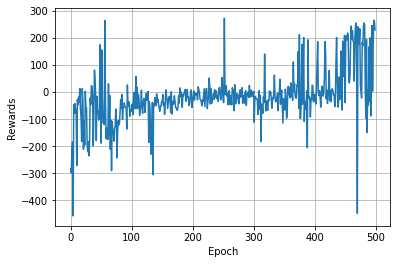

In [ ]:
import matplotlib.pyplot as plt
plt.plot(LOSS)
plt.ylabel('Rewards')
plt.xlabel('Epoch')
plt.grid()
plt.show()

## show the result movie

In [ ]:
from google.colab import drive
import os
drive.mount("/content/gdrive")
Path = os.getcwd() + '/gdrive/MyDrive/DLHW'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install -U colabgymrender==1.0.8 
!pip install box2d-py
!pip install box2d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import gym
import numpy as np
class DRL(nn.Module):
    def __init__(self):
        super(DRL, self).__init__()
        self.Layer1 = nn.Linear(8, 150) # State參數有8個
        self.Layer2 = nn.Linear(150, 120)
        self.Layer3 = nn.Linear(120, 4) # Action參數有4個
    def forward(self, x):
        X = nn.ReLU()(self.Layer1(x))
        X = nn.ReLU()(self.Layer2(X))
        X = self.Layer3(X) # 最後一層不做softmax轉換機率，直接做output
        return X
model = DRL()
model.load_state_dict(torch.load(Path + '/DRL.pt')['model'])

<All keys matched successfully>

In [ ]:
env = gym.make("LunarLander-v2")
epsilon = 0.009999536012924389
def agent_move(mod, enviroment, state, epsilon):
    if np.random.rand() <= epsilon:
        return int(np.random.choice([0, 1, 2, 3], 1))
    else:
        #act_prob = Categorical(action_prob)
        #act = act_prob.sample()
        act_val = mod(state)
        act = torch.argmax(act_val)
        return int(act)

In [ ]:
from colabgymrender.recorder import Recorder
directory = Path
env = Recorder(env, directory)
state = env.reset()
state = torch.from_numpy(state.reshape(1, 8)).to(torch.float32)
finish = False
step = 0
while not finish and step < 3000:
    act = agent_move(model, env, state, epsilon)
    state, reward, finish, _ = env.step(act)
    state = torch.from_numpy(state.reshape(1, 8)).to(torch.float32)
    step += 1

env.play()

100%|█████████▉| 447/448 [00:02<00:00, 150.10it/s]


## (b) Please choose some hyper-parameters about collecting and using trajectories and analyze how these hyper-parameters affect the training result or training time.

### 上述演算法的 Hyper-parameters 應為epsilon、epsilon_decay。其中如果epsilon越大，則表示飛行器的軌跡中，以value network選擇的動作越少，而隨機動作越多，因此該飛行軌跡則會有較高的隨機性。我認為epsilon的使用原因在於，當模型初始訓練時，其動作可能單一便可穩定取得local optimum的reward。因此加入epsilon此一隨機性讓模型學習時能考慮更多的動作（有如行為探索一樣），因此更能學習到降落的行為。而epsilon_decay則是控制學習時，讓epsilon減小的速度。當value network學習的越好，模型越能從中找出最高的value的動作並以此作為決策。因此到訓練後期時，會逐漸捨棄掉隨機性，而開始改由模型自行決定決策。故epsilon_decay是其隨機性的遞減速度，值應屆於(0, 1)開區間。越高則表示epsilon下降越慢，訓練時間可能拉長，較不容易收斂，且決策隨機性較高；越低則epsilon下降很快，決策會容易變單一，較難找到飛行器降落的方法。綜上所述，藉由我的文獻查找，epsilon設定為1，epsilon_decay設為0.996的效果最佳。

# 第二大題

## (a) Please use stochastic policy (categorical distribution)1 and trained DQN model from previous part to train an agent in LunarLander-v2 environment.(show the result movie)

In [ ]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install -U colabgymrender==1.0.8 
!pip install box2d-py
!pip install box2d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
from torch.distributions import Categorical
import torch.nn.functional as F
class actor(nn.Module):
    def __init__(self):
        super(actor, self).__init__()
        self.Layer1 = nn.Linear(8, 150) # State參數有8個
        self.Layer2 = nn.Linear(150, 150)
        self.Layer3 = nn.Linear(150, 4) # Action參數有4個
    def forward(self, state):
        X = nn.ReLU(inplace=False)(self.Layer1(state))
        X = nn.ReLU(inplace=False)(self.Layer2(X))
        X = self.Layer3(X) ## 輸出機率
        return X
class critic(nn.Module):
    def __init__(self):
        super(critic, self).__init__()
        self.Layer1 = nn.Linear(8, 150) # State參數有8個
        self.Layer2 = nn.Linear(150, 150)
        self.Layer3 = nn.Linear(150, 1) # Value參數有1個
    def forward(self, state):
        X = nn.ReLU(inplace=False)(self.Layer1(state))
        X = nn.ReLU(inplace=False)(self.Layer2(X))
        X = self.Layer3(X) ## 輸出價值
        return X

In [ ]:
def initialization(model):
    if type(model) == nn.Linear:
        torch.nn.init.xavier_normal_(model.weight) ## 常態分配初始化參數
        model.bias.data.fill_(0)

In [ ]:
class actor_and_critic(nn.Module):
    def __init__(self, actor, critic):
        super(actor_and_critic, self).__init__()
        self.actor = actor
        self.critic = critic
    def forward(self, state):
        pred_act = self.actor(state)
        pred_val = self.critic(state)
        return pred_act, pred_val # 1.決策 2.價值

In [ ]:
ACTOR = actor()
CRITIC = critic()
model = actor_and_critic(ACTOR, CRITIC)
lr = 0.0005
OPT = torch.optim.Adam(model.parameters(), lr = lr)

In [ ]:
env = gym.make("LunarLander-v2")
rnd_state = 100
env.seed(rnd_state)
np.random.seed(rnd_state)
torch.manual_seed(rnd_state)

In [ ]:
def update_policy(policy, states, actions, log_prob_actions, advantages, returns, optimizer, ppo_steps, ppo_clip):
    # 損失函數紀錄
    PLOSS = 0 
    VLOSS = 0
    # 將資料全部取消梯度
    states = states.detach()
    actions = actions.detach()
    log_prob_actions = log_prob_actions.detach()
    advantages = advantages.detach()
    returns = returns.detach()
    # 
    for _ in range(ppo_steps):
        ######
        pred_act, pred_val = policy(states) # 所有的環境狀況，皆納入計算act和val
        pred_val = pred_val.squeeze(-1) # 輸出原本是(N, 1)，squeeze改為(N, )
        action_prob = nn.Softmax()(pred_act) # 計算每個動作的機率，輸出為(N, 4)，此為舊的機率，也就是已經在環境中step過的機率狀態
        ######
        dist = Categorical(action_prob) # 用pi(a, s)抽樣
        new_log_prob_actions = dist.log_prob(actions) # 用虛擬抽樣的部分創造新的機率，同樣是(N, 4)
        ######
        IS = (new_log_prob_actions - log_prob_actions).exp() # 計算importance sampling
        ploss = - torch.min(IS * advantages, torch.clamp(IS, min = 1.0 - ppo_clip, max = 1.0 + ppo_clip) * advantages).mean() # 算PPO loss
        vloss = F.smooth_l1_loss(returns, pred_val).mean() # 論壇上查到的value net之loss function
        ######
        optimizer.zero_grad()
        ploss.backward()
        vloss.backward()
        optimizer.step()
        #####
        PLOSS += ploss.item()
        VLOSS += vloss.item()
    return PLOSS / ppo_steps, VLOSS / ppo_steps

In [ ]:
training = list()
PROBS = list()
CHECK = torch.tensor(env.reset()).to(torch.float32)
for epoch in range(1500):
    states, acts, log_act_probs, rewards, values  = list(), list(), list(), list(), list()
    REWARDS = 0
    state = env.reset()
    step = 0
    done = 0
    while not done:
        state = torch.tensor(state).to(torch.float32)
        states.append(state)
        pred_act, pred_val = model(state)
        act_prob = nn.Softmax()(pred_act).view(-1)
        dist = Categorical(act_prob)
        ACT = dist.sample()
        act = int(ACT)
        log_act_prob = dist.log_prob(ACT)
        state, reward, done, _ = env.step(act)
        acts.append(ACT)
        log_act_probs.append(log_act_prob)
        values.append(pred_val)
        rewards.append(reward)
        REWARDS += float(reward)
    states = torch.stack(states)
    acts = torch.stack(acts)
    log_act_probs = torch.stack(log_act_probs)
    values = torch.stack(values)
    # 計算returns
    returns = list()
    RETURNS = 0
    for r in reversed(rewards):
        RETURNS = r + RETURNS*0.99
        returns.insert(0, RETURNS)
    returns = torch.tensor(returns)
    returns = (returns - returns.mean())/ returns.std()
    # 計算advantages
    advantages = returns - values
    advantages = (advantages - advantages.mean())/ advantages.std()
    #A, B = PPO_update(model, states, acts, log_act_probs, returns, advantages)
    update_policy(model, states, acts, log_act_probs, advantages, returns, OPT, ppo_steps = 5, ppo_clip = 0.2)
    training.append(REWARDS)
    PROBS.append(model(CHECK)[0])
    print('EPOCH {}, Rewards: {}, Avg: {}'.format(len(training), REWARDS, np.mean(training)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


EPOCH 1, Rewards: -264.18364688371264, Avg: -264.18364688371264
EPOCH 2, Rewards: -212.28519271086282, Avg: -238.23441979728773
EPOCH 3, Rewards: -231.307160022526, Avg: -235.92533320570047
EPOCH 4, Rewards: -101.49827735255138, Avg: -202.31856924241322
EPOCH 5, Rewards: -97.76545657310287, Avg: -181.40794670855115
EPOCH 6, Rewards: -111.05316760742537, Avg: -169.68215019169685
EPOCH 7, Rewards: -180.9315579544375, Avg: -171.2892084435169
EPOCH 8, Rewards: -96.54717605638105, Avg: -161.94645439512496
EPOCH 9, Rewards: -98.3969920398234, Avg: -154.88540302231365
EPOCH 10, Rewards: -83.57686185631508, Avg: -147.75454890571382
EPOCH 11, Rewards: -125.7960269936083, Avg: -145.75831964097696
EPOCH 12, Rewards: -131.71240796258866, Avg: -144.58782700111126
EPOCH 13, Rewards: -100.88429021482608, Avg: -141.22601647908934
EPOCH 14, Rewards: -117.39986054455933, Avg: -139.52414819805148
EPOCH 15, Rewards: -79.14451148550398, Avg: -135.49883908388162
EPOCH 16, Rewards: -89.8522436649157, Avg: -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


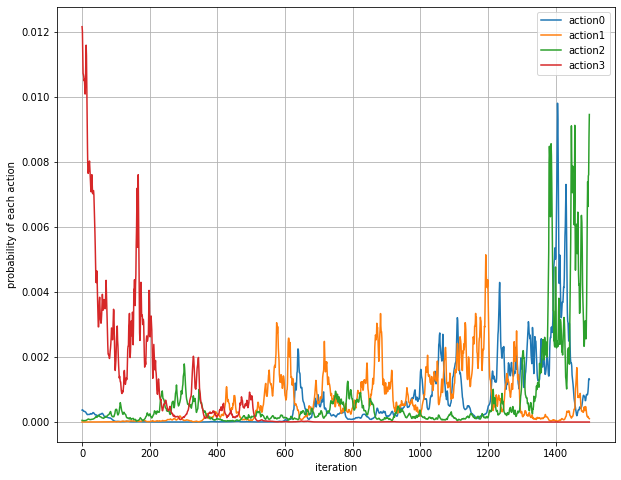

In [ ]:
import matplotlib.pyplot as plt
DATA = torch.stack(PROBS)
plt.figure(figsize = (10, 8))
for i in range(4):
    plt.plot(nn.Softmax()(DATA[:,i]).detach(), label = 'action' + str(i))
plt.grid()
plt.xlabel('iteration')
plt.ylabel('probability of each action')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
import os
drive.mount("/content/gdrive")
Path = os.getcwd() + '/gdrive/MyDrive/DLHW'
FILE = 'PPO.pt'
torch.save({'model':model.state_dict()}, Path + '/' + FILE)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from colabgymrender.recorder import Recorder
directory = Path
env = Recorder(env, directory)
state = env.reset()
state = torch.from_numpy(state.reshape(1, 8)).to(torch.float32)
finish = False
step = 0
while not finish and step < 3000:
    pred_act, pred_val = model(state)
    act_prob = nn.Softmax()(pred_act).view(-1)
    dist = Categorical(act_prob)
    ACT = dist.sample()
    act = int(ACT)
    state, reward, finish, _ = env.step(act)
    state = torch.from_numpy(state.reshape(1, 8)).to(torch.float32)
    step += 1

env.play()

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3702784/45929032 bytes (8.1%)7225344/45929032 bytes (15.7%)10764288/45929032 bytes (23.4%)14344192/45929032 bytes (31.2%)17973248/45929032 bytes (39.1%)21708800/45929032 bytes (47.3%)25018368/45929032 bytes (54.5%)28409856/45929032 bytes (61.9%)32104448/45929032 bytes (69.9%)35807232/45929032 bytes (78.0%)39452672/45929032 bytes (85.9%)43106304/45929032 bytes (93.9%)

100%|█████████▉| 1001/1002 [00:03<00:00, 294.37it/s]
